In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import load_model

# EJEMPLO MINST CON KERAS

Carga de la base de datos MNIST y visualizado de su información

Tamaño de los datos de entrenamiento:
 - Imágenes: (60000, 28, 28)
 - Etiquetas: (60000,)
Tamaño de los datos de test:
 - Imágenes: (10000, 28, 28)
 - Etiquetas: (10000,)


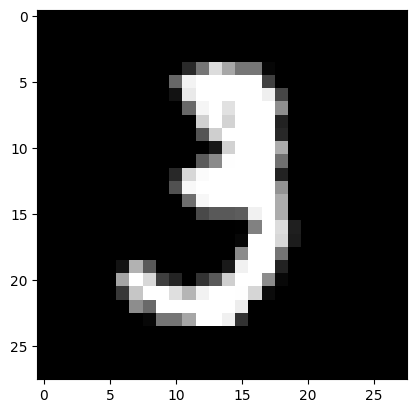

Ejemplo de etiqueta: 3


In [14]:
# Cargamos la base de datos desde el API de Keras
(X_train, Y_train), (X_test, Y_test) = load_data()

# Imprimimos las dimensiones de los datos
print('Tamaño de los datos de entrenamiento:')
print(f' - Imágenes: {X_train.shape}')
print(f' - Etiquetas: {Y_train.shape}')
print('Tamaño de los datos de test:')
print(f' - Imágenes: {X_test.shape}')
print(f' - Etiquetas: {Y_test.shape}')

# Visualización de un ejemplo
id_ejemplo = 10
plt.imshow(X_train[10], cmap='gray')
plt.show()
print(f'Ejemplo de etiqueta: {Y_train[id_ejemplo]}')

Preprocesado de los datos

In [15]:
# Convertimos los datos a punto flotante y normalizamos los valores de las imágenes entre 0 y 1
X_train = X_train / 255.
X_test = X_test / 255.

# Redimensionamos las imágenes para que sean un vector de características
# Para esto, pasamos de (N, 28, 28) a un tamaño de (N, 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Convertimos las etiquetas categóricas al formato "one-hot"
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

# Comprobamos la nueva forma de los datos
print('Tamaño de los datos de entrenamiento:')
print(f' - Imágenes: {X_train.shape}')
print(f' - Etiquetas: {Y_train.shape}')
print('Tamaño de los datos de test:')
print(f' - Imágenes: {X_test.shape}')
print(f' - Etiquetas: {Y_test.shape}')

print(f'Ejemplo de etiqueta: {Y_train[id_ejemplo]}')

Tamaño de los datos de entrenamiento:
 - Imágenes: (60000, 784)
 - Etiquetas: (60000, 10)
Tamaño de los datos de test:
 - Imágenes: (10000, 784)
 - Etiquetas: (10000, 10)
Ejemplo de etiqueta: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Definición de la red neuronal

In [17]:
modelo = Sequential()
modelo.add(Input(shape=(784,)))
modelo.add(Dense(512, activation='relu'))
modelo.add(Dense(10, activation='softmax'))
print(modelo.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

None


Compilación del modelo y entrenamiento (en vez de crear el conjunto de validación podemos indicar en el fit que dedice un porcentaje a la validación)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historial = modelo.fit(X_train, Y_train, validation_split=0.25,epochs=15,batch_size=32, verbose=1)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9975 - loss: 0.0075 - val_accuracy: 0.9782 - val_loss: 0.1211
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.9765 - val_loss: 0.1419
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9985 - loss: 0.0048 - val_accuracy: 0.9753 - val_loss: 0.1520
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9979 - loss: 0.0063 - val_accuracy: 0.9778 - val_loss: 0.1271
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9990 - loss: 0.0033 - val_accuracy: 0.9757 - val_loss: 0.1556
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9782 - val_loss: 0.1458
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9983 - loss: 0.0053 - val_accuracy: 0.9781 - val_loss: 0.1412
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9994 - los

Visualizado de la gráfica de la tasa de acierto en entrenamiento con respecto a la obtenida en validación

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


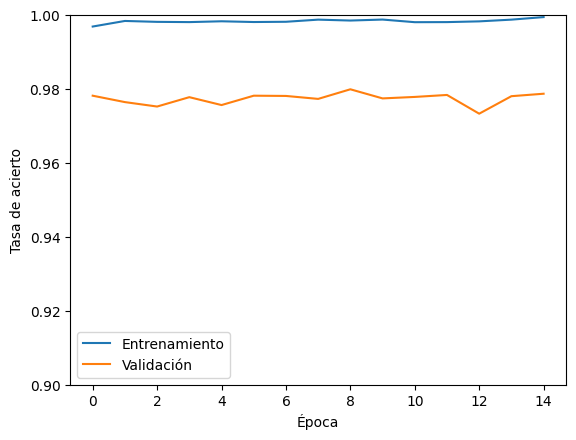

In [25]:
# Imprimimos las claves del diccionario
print(historial.history.keys())


# Generamos una gráfica con la precisión en entrenamiento y validación
plt.plot(historial.history['accuracy'])
plt.plot(historial.history['val_accuracy'])
plt.xlabel('Época')
plt.ylabel('Tasa de acierto')
plt.ylim(0.9, 1) 
plt.legend(['Entrenamiento', 'Validación'])
plt.show()

Predicción del conjunto de test con el modelo entrenado

In [26]:
print(np.argmax(modelo.predict(X_test), axis=-1))
loss, accuracy = modelo.evaluate(X_test, Y_test, verbose=1)
print('Precisión sobre test: {:.2f}%'.format(100*accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[7 2 1 ... 4 5 6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9806 - loss: 0.1520
Precisión sobre test: 98.32%


Guardado del modelo

In [27]:
modelo.save('Resultados/modelo_mnist.keras')

Carga del modelo ya entrenado

In [29]:
nuevo_modelo = load_model('Resultados/modelo_mnist.keras')
print(nuevo_modelo.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

None


Comprobación de la precisión del modelo guardado sobre el conjunto de test

In [30]:
loss, accuracy = nuevo_modelo.evaluate(X_test, Y_test, verbose=0)
print('Precisión sobre test: {:.2f}%'.format(100*accuracy))

Precisión sobre test: 98.32%
